<img src="https://github.com/hernancontigiani/ceia_memorias_especializacion/raw/master/Figures/logoFIUBA.jpg" width="500" align="center">


# Procesamiento de lenguaje natural
## Bert Sentiment Analysis
[Ejemplo similar en Pytorch](https://colab.research.google.com/drive/1PHv-IRLPCtv7oTcIGbsgZHqrB5LPvB7S#scrollTo=m_mRflxPl32F)

Se fixea versión de la librería de transformers ya que da error cuando se quiere hacer un nuevo modelo (https://stackoverflow.com/questions/78129126/typeerror-exception-encountered-when-calling-layer-embeddings-type-tfbertemb)

In [1]:
!pip install "transformers==4.31.0"  --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 23.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 49.5 MB/s eta 0:00:00


In [2]:
import tensorflow
from transformers import TFBertModel

### Definiendo modelo

In [3]:
bert_model = TFBertModel.from_pretrained("bert-base-uncased")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [4]:
max_length = 140
output_shape = 3

In [5]:
bert_model.bert.trainable = False

input_ids = tensorflow.keras.layers.Input(shape=(max_length,), dtype=tensorflow.int32, name='input_ids')
attention_mask = tensorflow.keras.layers.Input(shape=(max_length,), dtype=tensorflow.int32, name='attention_mask')

outputs = bert_model(input_ids, attention_mask=attention_mask)

pooled_output = outputs.pooler_output

x = tensorflow.keras.layers.Dropout(0.2)(pooled_output)
output = tensorflow.keras.layers.Dense(output_shape, activation='softmax')(x)

model = tensorflow.keras.Model(inputs=[input_ids, attention_mask], outputs=output)

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy',tensorflow.keras.metrics.F1Score(average='macro')])

In [6]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 140)]                0         []                            
                                                                                                  
 attention_mask (InputLayer  [(None, 140)]                0         []                            
 )                                                                                                
                                                                                                  
 tf_bert_model (TFBertModel  TFBaseModelOutputWithPooli   1094822   ['input_ids[0][0]',           
 )                           ngAndCrossAttentions(last_   40         'attention_mask[0][0]']      
                             hidden_state=(None, 140, 7                                       

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_train_metrics(history):
    epoch_count = range(1, len(history.history['accuracy']) + 1)
    sns.lineplot(x=epoch_count,  y=history.history['accuracy'], label='train acc')
    sns.lineplot(x=epoch_count,  y=history.history['val_accuracy'], label='valid acc')
    plt.show()

### Datos
Utilizaremos como dataset críticas de Google Apps en formato csv.

In [8]:
# Descargar la carpeta de dataset
!curl -L -o 'apps.csv' 'https://drive.google.com/u/0/uc?id=1S6qMioqPJjyBLpLVz4gmRTnJHnjitnuV&export=download&confirm=t'
!curl -L -o 'reviews.csv' 'https://drive.google.com/u/0/uc?id=1zdmewp7ayS4js4VtrJEHzAheSW-5NBZv&export=download&confirm=t'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  131k  100  131k    0     0   102k      0  0:00:01  0:00:01 --:--:--  128M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 7002k  100 7002k    0     0   319k      0  0:00:21  0:00:21 --:--:-- 1516k


In [9]:
import pandas as pd
# Armar el dataset
df = pd.read_csv('reviews.csv')
df.head()

,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
0,Andrew Thomas,https://lh3.googleusercontent.com/a-/AOh14GiHd...,Update: After getting a response from the deve...,1,21,4.17.0.3,2020-04-05 22:25:57,"According to our TOS, and the term you have ag...",2020-04-05 15:10:24,most_relevant,com.anydo
1,Craig Haines,https://lh3.googleusercontent.com/-hoe0kwSJgPQ...,Used it for a fair amount of time without any ...,1,11,4.17.0.3,2020-04-04 13:40:01,It sounds like you logged in with a different ...,2020-04-05 15:11:35,most_relevant,com.anydo
2,steven adkins,https://lh3.googleusercontent.com/a-/AOh14GiXw...,Your app sucks now!!!!! Used to be good but no...,1,17,4.17.0.3,2020-04-01 16:18:13,This sounds odd! We are not aware of any issue...,2020-04-02 16:05:56,most_relevant,com.anydo
3,Lars Panzerbjørn,https://lh3.googleusercontent.com/a-/AOh14Gg-h...,"It seems OK, but very basic. Recurring tasks n...",1,192,4.17.0.2,2020-03-12 08:17:34,We do offer this option as part of the Advance...,2020-03-15 06:20:13,most_relevant,com.anydo
4,Scott Prewitt,https://lh3.googleusercontent.com/-K-X1-YsVd6U...,Absolutely worthless. This app runs a prohibit...,1,42,4.17.0.2,2020-03-14 17:41:01,We're sorry you feel this way! 90% of the app ...,2020-03-15 23:45:51,most_relevant,com.anydo


In [10]:
print("Cantidad de críticas:", len(df))

Cantidad de críticas: 15746


<Axes: xlabel='score', ylabel='count'>

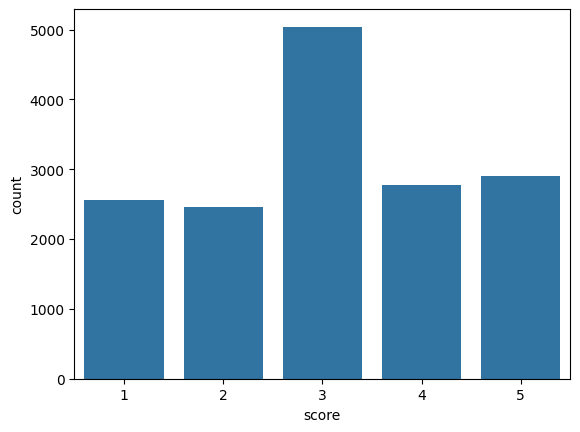

In [11]:
# ¿Cómo están balanceados los datos?
sns.countplot(x=df.score)

## Limpieza de datos

In [12]:
# Balancear los datos
df['sentiment'] = df.score.apply(lambda x: 0 if x <=2 else 1 if x == 3 else 2)
class_names = ['negative', 'neutral', 'positive']

In [ ]:
ax = sns.countplot(df.sentiment)
plt.xlabel('review sentiment')
ax.set_xticklabels(class_names);

In [14]:
sentences = df['content'].values
print("sentences shape:", sentences.shape)
sentences[:3]

sentences shape: (15746,)


array(["Update: After getting a response from the developer I would change my rating to 0 stars if possible. These guys hide behind confusing and opaque terms and refuse to budge at all. I'm so annoyed that my money has been lost to them! Really terrible customer experience. Original: Be very careful when signing up for a free trial of this app. If you happen to go over they automatically charge you for a full years subscription and refuse to refund. Terrible customer experience and the app is just OK.",
       'Used it for a fair amount of time without any problems. Suddenly then asked me to create an account or log using Google or FB. I used my Google one only to discover everything was gone!',
       "Your app sucks now!!!!! Used to be good but now doesn't update until I physically open it up and then close it then scroll and then it finally shows what I want to put on the list!!!!!! And I FRIGGEN paid for this garbage!!!!!!!"],
      dtype=object)

Median: 139.0


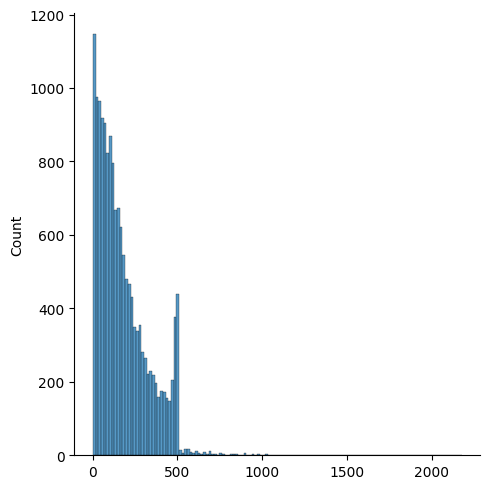

In [15]:
import numpy as np

sentence_lens = []

for sentence in sentences:
  sentence_lens.append(len(sentence))

print("Median:", np.median(sentence_lens))
sns.displot(sentence_lens)

In [16]:
from tensorflow.keras.utils import to_categorical

In [18]:
y = df['sentiment'].values
print("y shape:", y.shape)
y = to_categorical(y)
print(y[:3])
output_shape = y.shape[1]
print("output shape:", output_shape)

y shape: (15746,)
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]
output shape: 3


## 1 - Data generator


In [19]:
from transformers import InputExample, InputFeatures  # Métodos para transformar el dataset
from transformers import BertTokenizer

In [20]:
# Muy importante que para tensorflow los modelos Bert deben empezar con "TF"
# de lo contrario estaremos utilizando un modelo para pytorch

# Descargamos el modelo base de BERT más liviano y su correspondiente tokenizer
bert_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

In [21]:
# Del dataset original accederemos a los datos por índices (idx)
# mezclados aleatoriamente
from sklearn.model_selection import train_test_split
max_length = 140 # BERT soporta máximo 512
indices = np.arange(len(sentences))
idx_train_val, idx_test = train_test_split(indices, test_size=0.2, random_state=42)
idx_train, idx_val = train_test_split(idx_train_val, test_size=0.2, random_state=42)

In [22]:
print(idx_train.shape[0], idx_val.shape[0], idx_test.shape[0])

10076 2520 3150


In [23]:

def convert_data_to_examples(text, labels, idx_train, idx_val):
    # Armamos un "InputExample" para los datos de entrenamiento y validación
    train_InputExamples = [InputExample(guid=None, # Globally unique ID for bookkeeping, unused in this case
                                                          text_a = text[i],
                                                          text_b = None,
                                                          label = labels[i]) for i in idx_train]

    validation_InputExamples = [InputExample(guid=None, # Globally unique ID for bookkeeping, unused in this case
                                                          text_a = text[i],
                                                          text_b = None,
                                                          label = labels[i]) for i in idx_val]

    return train_InputExamples, validation_InputExamples


def convert_examples_to_tf_dataset(examples, bert_tokenizer, max_length=512):
    # Transformamos los datos de entrada en tensorres de:
    # input_ids --> token id
    # attention_mask
    # token type
    features = []

    for e in examples:
        # Documentation is really strong for this method, so please take a look at it
        input_dict = bert_tokenizer.encode_plus(
            e.text_a,
            add_special_tokens=True,
            max_length=max_length, # truncates if len(s) > max_length
            return_token_type_ids=False,
            return_attention_mask=True,
            padding='max_length', # pads to the right by default # CHECK THIS for pad_to_max_length
            truncation=True
        )

        input_ids, attention_mask = (input_dict["input_ids"], input_dict['attention_mask'])

        features.append(
            InputFeatures(
                input_ids=input_ids, attention_mask=attention_mask, label=e.label
            )
        )

    def gen():
    # Función generadora para no levantar todos los datos en un instante
        for f in features:
            yield (
                {
                    "input_ids": f.input_ids,
                    "attention_mask": f.attention_mask,
                },
                f.label,
            )

    return tensorflow.data.Dataset.from_generator(
        # Tensorflow dataset generator (basado en el generador y en el esquema de datos definido)
        gen,
        ({"input_ids": tensorflow.int32, "attention_mask": tensorflow.int32}, tensorflow.float32),
        (
            {
                "input_ids": tensorflow.TensorShape([None]),
                "attention_mask": tensorflow.TensorShape([None]),
            },
            tensorflow.TensorShape([output_shape]),
        ),
    )

In [24]:
train_InputExamples, validation_InputExamples = convert_data_to_examples(sentences, y, idx_train, idx_val)

train_data = convert_examples_to_tf_dataset(list(train_InputExamples), bert_tokenizer, max_length=max_length)
# shuffle 100 --> mezcla los datos y los lee a de 100 unidades
# batch 32 --> ejecuta una epoca de entrenamiento de a 32 unidades
train_data = train_data.shuffle(100).batch(32)

validation_data = convert_examples_to_tf_dataset(list(validation_InputExamples), bert_tokenizer, max_length=max_length)
validation_data = validation_data.batch(32)

In [25]:
pred_sentences = [sentences[i] for i in idx_test]
tf_batch = bert_tokenizer(pred_sentences, max_length=max_length, padding=True, truncation=True, return_tensors='tf')

In [26]:
X_test = [tf_batch['input_ids'],
          tf_batch['attention_mask']]

In [27]:
y_test = y[idx_test]

## 2 - BERT multiclass classification

In [28]:
history1 = model.fit(train_data, epochs=5, validation_data=validation_data)

Epoch 1/5
315/315 [==============================] - 50s 116ms/step - loss: 1.1173 - accuracy: 0.3974 - f1_score: 0.3917 - val_loss: 1.0205 - val_accuracy: 0.5163 - val_f1_score: 0.4274
Epoch 2/5
315/315 [==============================] - 32s 102ms/step - loss: 1.0393 - accuracy: 0.4596 - f1_score: 0.4513 - val_loss: 1.0009 - val_accuracy: 0.4627 - val_f1_score: 0.3995
Epoch 3/5
315/315 [==============================] - 32s 103ms/step - loss: 1.0026 - accuracy: 0.4914 - f1_score: 0.4814 - val_loss: 0.9435 - val_accuracy: 0.5433 - val_f1_score: 0.4826
Epoch 4/5
315/315 [==============================] - 32s 102ms/step - loss: 0.9763 - accuracy: 0.5105 - f1_score: 0.4997 - val_loss: 0.9191 - val_accuracy: 0.5528 - val_f1_score: 0.5073
Epoch 5/5
315/315 [==============================] - 32s 102ms/step - loss: 0.9599 - accuracy: 0.5227 - f1_score: 0.5122 - val_loss: 0.8990 - val_accuracy: 0.5615 - val_f1_score: 0.5356


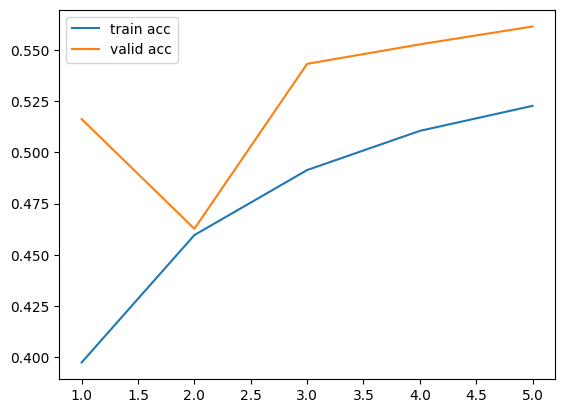

In [29]:
plot_train_metrics(history1)

Hasta aquí se realizó el punto 1 del desafío (*Intenten hacer un primer entrenamiento con el código que ya está, como para comprobar que lo pueden ejecutar y que lo entienden. Lleguen sólo hasta la parte que dice "3-BERT Fine tuning", ahí se propone hacer fine tuning de todo BERT, lo cual les va a llevar muchísimo tiempo, así que no es requisito correr la notebook a partir de ahí.*)

In [30]:
y_hat_prob = model.predict(X_test)
y_hat_prob[:3]

99/99 [==============================] - 11s 77ms/step


array([[0.48158026, 0.35319278, 0.16522698],
       [0.46379533, 0.3028292 , 0.23337546],
       [0.2611835 , 0.34817812, 0.3906384 ]], dtype=float32)

In [31]:
y_hat = np.argmax(y_hat_prob, axis=1)

In [32]:
# Calcular la exactitud (accuracy)
scores = model.evaluate(X_test, y_test)
scores[1]

99/99 [==============================] - 11s 80ms/step - loss: 0.9018 - accuracy: 0.5876 - f1_score: 0.5633


0.5876190662384033

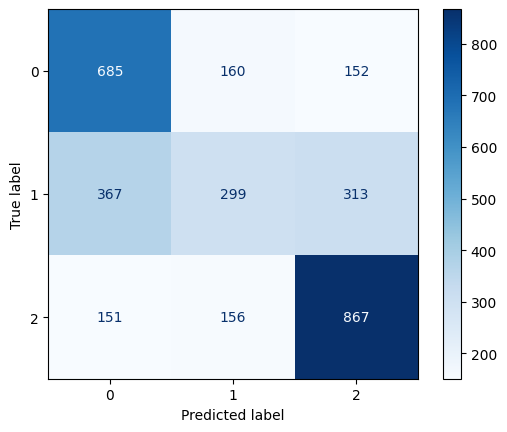

In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test.argmax(axis=1), y_hat)
cmd = ConfusionMatrixDisplay(cm, display_labels=list(range(3)))
cmd.plot(cmap=plt.cm.Blues)
plt.show()

*Reporten el F1-score en un conjunto de datos de prueba.*

In [ ]:
set_range = slice(100, 600)
X_test_set = [X_test[0][set_range, :], X_test[1][set_range, :]]

scores = model.evaluate(X_test_set, y_test[set_range])
print("F1 score:", scores[2])

16/16 [==============================] - 5s 319ms/step - loss: 0.9158 - accuracy: 0.5660 - f1_score: 0.5233
F1 score: 0.5232682824134827


*En el notebook está planteado un balance de datos con 3 clases a partir de las 5 clases originales. Intenten entrenar un modelo con las 5 clases originales.*

In [35]:
df = pd.read_csv('reviews.csv')
df.head()

,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
0,Andrew Thomas,https://lh3.googleusercontent.com/a-/AOh14GiHd...,Update: After getting a response from the deve...,1,21,4.17.0.3,2020-04-05 22:25:57,"According to our TOS, and the term you have ag...",2020-04-05 15:10:24,most_relevant,com.anydo
1,Craig Haines,https://lh3.googleusercontent.com/-hoe0kwSJgPQ...,Used it for a fair amount of time without any ...,1,11,4.17.0.3,2020-04-04 13:40:01,It sounds like you logged in with a different ...,2020-04-05 15:11:35,most_relevant,com.anydo
2,steven adkins,https://lh3.googleusercontent.com/a-/AOh14GiXw...,Your app sucks now!!!!! Used to be good but no...,1,17,4.17.0.3,2020-04-01 16:18:13,This sounds odd! We are not aware of any issue...,2020-04-02 16:05:56,most_relevant,com.anydo
3,Lars Panzerbjørn,https://lh3.googleusercontent.com/a-/AOh14Gg-h...,"It seems OK, but very basic. Recurring tasks n...",1,192,4.17.0.2,2020-03-12 08:17:34,We do offer this option as part of the Advance...,2020-03-15 06:20:13,most_relevant,com.anydo
4,Scott Prewitt,https://lh3.googleusercontent.com/-K-X1-YsVd6U...,Absolutely worthless. This app runs a prohibit...,1,42,4.17.0.2,2020-03-14 17:41:01,We're sorry you feel this way! 90% of the app ...,2020-03-15 23:45:51,most_relevant,com.anydo


In [36]:
df.score.unique()

array([1, 2, 3, 4, 5])

In [38]:
# Se aplica una transformación para que el id de clase inicie en 0
y = df.score.apply(lambda x: x - 1).values
y = to_categorical(y)
print("y shape:", y.shape)

output_shape = y.shape[1]
print("output lenght:", output_shape)

sentences = df['content'].values
print("sentences shape:", sentences.shape)

y shape: (15746, 5)
output lenght: 5
sentences shape: (15746,)


In [39]:
from sklearn.model_selection import train_test_split

max_length = 140 # BERT soporta máximo 512

bert_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

indices = np.arange(len(sentences))

idx_train_val, idx_test = train_test_split(indices, test_size=0.2, random_state=42)
idx_train, idx_val = train_test_split(idx_train_val, test_size=0.2, random_state=42)

train_InputExamples, validation_InputExamples = convert_data_to_examples(sentences, y, idx_train, idx_val)

train_data = convert_examples_to_tf_dataset(list(train_InputExamples), bert_tokenizer, max_length=max_length)
# shuffle 100 --> mezcla los datos y los lee a de 100 unidades
# batch 32 --> ejecuta una epoca de entrenamiento de a 32 unidades
train_data = train_data.shuffle(100).batch(32)

validation_data = convert_examples_to_tf_dataset(list(validation_InputExamples), bert_tokenizer, max_length=max_length)
validation_data = validation_data.batch(32)

pred_sentences = [sentences[i] for i in idx_test]
tf_batch = bert_tokenizer(pred_sentences, max_length=max_length, padding=True, truncation=True, return_tensors='tf')

X_test = [tf_batch['input_ids'], tf_batch['attention_mask']]
y_test = y[idx_test]

In [40]:
bert_model = TFBertModel.from_pretrained("bert-base-uncased")
bert_model.bert.trainable = False

input_ids = tensorflow.keras.layers.Input(shape=(max_length,), dtype=tensorflow.int32, name='input_ids')
attention_mask = tensorflow.keras.layers.Input(shape=(max_length,), dtype=tensorflow.int32, name='attention_mask')

outputs = bert_model(input_ids, attention_mask=attention_mask)

pooled_output = outputs.pooler_output

x = tensorflow.keras.layers.Dropout(0.2)(pooled_output)
output = tensorflow.keras.layers.Dense(output_shape, activation='softmax')(x)

model1 = tensorflow.keras.Model(inputs=[input_ids, attention_mask], outputs=output)

model1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy',tensorflow.keras.metrics.F1Score(average='macro')])

model1.summary()

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 140)]                0         []                            
                                                                                                  
 attention_mask (InputLayer  [(None, 140)]                0         []                            
 )                                                                                                
                                                                                                  
 tf_bert_model_1 (TFBertMod  TFBaseModelOutputWithPooli   1094822   ['input_ids[0][0]',           
 el)                         ngAndCrossAttentions(last_   40         'attention_mask[0][0]']      
                             hidden_state=(None, 140, 7                                     

In [41]:
history2 = model1.fit(train_data, epochs=10, validation_data=validation_data)

Epoch 1/10
315/315 [==============================] - 49s 117ms/step - loss: 1.5984 - accuracy: 0.2920 - f1_score: 0.2189 - val_loss: 1.4908 - val_accuracy: 0.3798 - val_f1_score: 0.2157
Epoch 2/10
315/315 [==============================] - 33s 103ms/step - loss: 1.5220 - accuracy: 0.3338 - f1_score: 0.2647 - val_loss: 1.4410 - val_accuracy: 0.3881 - val_f1_score: 0.2628
Epoch 3/10
315/315 [==============================] - 33s 103ms/step - loss: 1.4824 - accuracy: 0.3615 - f1_score: 0.2915 - val_loss: 1.4207 - val_accuracy: 0.4143 - val_f1_score: 0.3176
Epoch 4/10
315/315 [==============================] - 33s 103ms/step - loss: 1.4467 - accuracy: 0.3740 - f1_score: 0.3092 - val_loss: 1.4150 - val_accuracy: 0.3889 - val_f1_score: 0.3310
Epoch 5/10
315/315 [==============================] - 33s 103ms/step - loss: 1.4314 - accuracy: 0.3797 - f1_score: 0.3089 - val_loss: 1.3666 - val_accuracy: 0.4377 - val_f1_score: 0.3286
Epoch 6/10
315/315 [==============================] - 33s 103ms/s

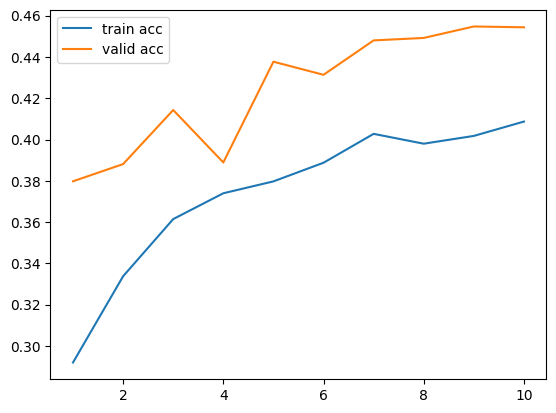

In [42]:
plot_train_metrics(history2)

In [43]:
set_range = slice(100, 600)
X_test_set = [X_test[0][set_range, :], X_test[1][set_range, :]]

scores = model1.evaluate(X_test_set, y_test[set_range])
print("F1 score:", scores[2])

16/16 [==============================] - 4s 80ms/step - loss: 1.3210 - accuracy: 0.4300 - f1_score: 0.3583
F1 score: 0.35827118158340454


In [44]:
y_hat_prob = model1.predict(X_test)
y_hat = np.argmax(y_hat_prob, axis=1)

99/99 [==============================] - 11s 78ms/step


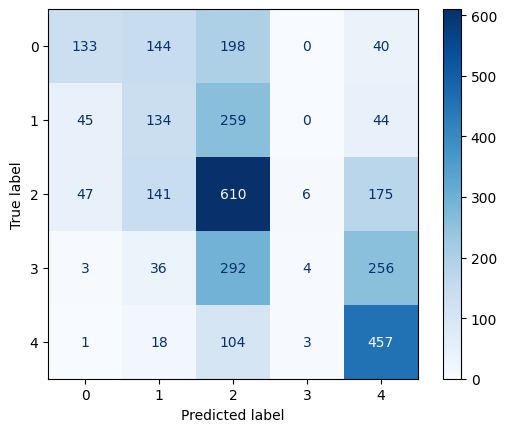

In [45]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test.argmax(axis=1), y_hat)
cmd = ConfusionMatrixDisplay(cm, display_labels=list(range(5)))
cmd.plot(cmap=plt.cm.Blues)
plt.show()

*En el notebook está planteado que luego de BERT viene la capa de salida softmax. Intenten agregar una capa densa previa antes antes de la de salida.*

In [49]:
n_dense_layers = 256

bert_model = TFBertModel.from_pretrained("bert-base-uncased")
bert_model.bert.trainable = False

input_ids = tensorflow.keras.layers.Input(shape=(max_length,), dtype=tensorflow.int32, name='input_ids')
attention_mask = tensorflow.keras.layers.Input(shape=(max_length,), dtype=tensorflow.int32, name='attention_mask')

outputs = bert_model(input_ids, attention_mask=attention_mask)

pooled_output = outputs.pooler_output

x = tensorflow.keras.layers.Dropout(0.2)(pooled_output)

dense_layer = tensorflow.keras.layers.Dense(n_dense_layers, activation='relu')(x)
dense_layer_do = tensorflow.keras.layers.Dropout(0.1)(dense_layer)

output = tensorflow.keras.layers.Dense(output_shape, activation='softmax')(dense_layer_do)

model2 = tensorflow.keras.Model(inputs=[input_ids, attention_mask], outputs=output)

model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy',tensorflow.keras.metrics.F1Score(average='macro')])

model2.summary()

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 140)]                0         []                            
                                                                                                  
 attention_mask (InputLayer  [(None, 140)]                0         []                            
 )                                                                                                
                                                                                                  
 tf_bert_model_3 (TFBertMod  TFBaseModelOutputWithPooli   1094822   ['input_ids[0][0]',           
 el)                         ngAndCrossAttentions(last_   40         'attention_mask[0][0]']      
                             hidden_state=(None, 140, 7                                     

In [50]:
history3 = model2.fit(train_data, epochs=15, validation_data=validation_data)

Epoch 1/15
315/315 [==============================] - 49s 116ms/step - loss: 1.5565 - accuracy: 0.3181 - f1_score: 0.1983 - val_loss: 1.4777 - val_accuracy: 0.3500 - val_f1_score: 0.1884
Epoch 2/15
315/315 [==============================] - 33s 103ms/step - loss: 1.4563 - accuracy: 0.3661 - f1_score: 0.2350 - val_loss: 1.4441 - val_accuracy: 0.3488 - val_f1_score: 0.2102
Epoch 3/15
315/315 [==============================] - 33s 103ms/step - loss: 1.4122 - accuracy: 0.3838 - f1_score: 0.2639 - val_loss: 1.3534 - val_accuracy: 0.4151 - val_f1_score: 0.3000
Epoch 4/15
315/315 [==============================] - 33s 104ms/step - loss: 1.3952 - accuracy: 0.3944 - f1_score: 0.2814 - val_loss: 1.3344 - val_accuracy: 0.4433 - val_f1_score: 0.3202
Epoch 5/15
315/315 [==============================] - 33s 103ms/step - loss: 1.3795 - accuracy: 0.4030 - f1_score: 0.2891 - val_loss: 1.3150 - val_accuracy: 0.4377 - val_f1_score: 0.3129
Epoch 6/15
315/315 [==============================] - 33s 103ms/s

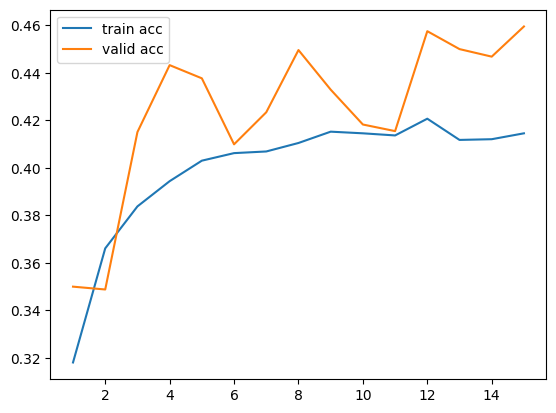

In [51]:
plot_train_metrics(history3)

In [52]:
y_hat_prob = model2.predict(X_test)
y_hat = np.argmax(y_hat_prob, axis=1)

99/99 [==============================] - 11s 77ms/step


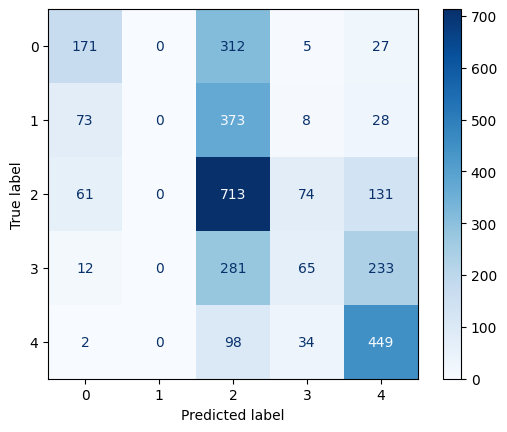

In [53]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test.argmax(axis=1), y_hat)
cmd = ConfusionMatrixDisplay(cm, display_labels=list(range(5)))
cmd.plot(cmap=plt.cm.Blues)
plt.show()

In [54]:
set_range = slice(400, 600)
X_test_set = [X_test[0][set_range, :], X_test[1][set_range, :]]

scores = model2.evaluate(X_test_set, y_test[set_range])
print("F1 score:", scores[2])

7/7 [==============================] - 4s 74ms/step - loss: 1.2686 - accuracy: 0.4500 - f1_score: 0.3734
F1 score: 0.3734295666217804


## 3 - BERT Fine tuning

In [ ]:
model2 = model

# Colocar todas las layers como entrenables
for layer in model2.layers:
  layer.trainable = True

# Como es fine tunning se recomiendo utiliza al menos un learning rate 100 veces
# menor
model2.compile(optimizer=keras.optimizers.Adam(learning_rate=0.00001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model2.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_ids (InputLayer)          [(None, 140)]        0                                            
__________________________________________________________________________________________________
attention_mask (InputLayer)     [(None, 140)]        0                                            
__________________________________________________________________________________________________
tf_bert_model_1 (TFBertModel)   TFBaseModelOutputWit 109482240   input_ids[0][0]                  
                                                                 attention_mask[0][0]             
__________________________________________________________________________________________________
dropout_119 (Dropout)           (None, 768)          0           tf_bert_model_1[0][1]      

In [ ]:
history2 = model2.fit(train_data, epochs=5, validation_data=validation_data)

Epoch 1/5
315/315 [==============================] - 592s 2s/step - loss: 0.7534 - accuracy: 0.6527 - val_loss: 0.6668 - val_accuracy: 0.6992
Epoch 2/5
315/315 [==============================] - 570s 2s/step - loss: 0.6114 - accuracy: 0.7290 - val_loss: 0.6275 - val_accuracy: 0.7325
Epoch 3/5
315/315 [==============================] - 571s 2s/step - loss: 0.4785 - accuracy: 0.8009 - val_loss: 0.6383 - val_accuracy: 0.7571
Epoch 4/5
315/315 [==============================] - 571s 2s/step - loss: 0.3461 - accuracy: 0.8616 - val_loss: 0.6397 - val_accuracy: 0.7893
Epoch 5/5
315/315 [==============================] - 571s 2s/step - loss: 0.2142 - accuracy: 0.9166 - val_loss: 0.7829 - val_accuracy: 0.7976


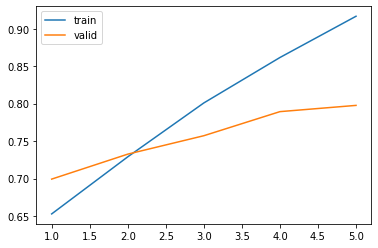

In [ ]:
plot_train_metrics(history2)

In [ ]:
y_hat_prob2 = model2.predict(X_test)
y_hat_prob2[:3]

array([[2.4404263e-01, 5.2928245e-01, 2.2667496e-01],
       [9.9471468e-01, 5.2647959e-03, 2.0519461e-05],
       [2.3615422e-02, 9.2708921e-01, 4.9295384e-02]], dtype=float32)

In [ ]:
y_hat2 = np.argmax(y_hat_prob2, axis=1)

In [ ]:
# Calcular la exactitud (accuracy)
scores = model1.evaluate(X_test, y_test)
scores[1]

99/99 [==============================] - 61s 582ms/step - loss: 0.7595 - accuracy: 0.8035


0.8034920692443848

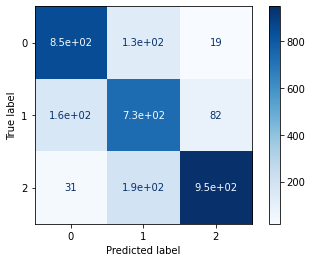

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test.argmax(axis=1), y_hat2)
cmd = ConfusionMatrixDisplay(cm, display_labels=list(range(10)))
cmd.plot(cmap=plt.cm.Blues)
plt.show()

## Salvar el modelo

In [ ]:
model2.save_weights('bert_weights.h5')

In [ ]:
# Descargar los pesos a nuestra PC
# Solo es necesario si se desea repetir el uso de este modelo en el futuro
from google.colab import files
files.download('bert_weights.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Levantar el modelo

In [ ]:
bert_model3 = TFBertModel.from_pretrained("bert-base-uncased")

input_ids = tensorflow.keras.layers.Input(shape=(max_length,), dtype=tensorflow.int32, name='input_ids')

# attention_mask - is a binary mask which tells BERT which tokens to attend and which not to attend.
# Encoder will add the 0 tokens to the some sequence which smaller than MAX_SEQUENCE_LENGTH,
# and attention_mask, in this case, tells BERT where is the token from the original data and where is 0 pad token:
attention_mask = tensorflow.keras.layers.Input((max_length,), dtype=tensorflow.int32, name='attention_mask')

# Get the pooled_output (embedding que representa toda la entrada)
output = bert_model3([input_ids, attention_mask])[1]

# We can also add dropout as regularization technique:
output = tensorflow.keras.layers.Dropout(rate=0.2)(output)

# Se puede agregar más capas Densas en el medio si se desea

# Provide number of classes to the final layer:
output = tensorflow.keras.layers.Dense(output_shape, activation='softmax')(output)

# Final model:
model3 = tensorflow.keras.models.Model(inputs=[input_ids, attention_mask], outputs=output)

/usr/local/lib/python3.7/dist-packages/transformers/configuration_utils.py:337: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if you are using the `Trainer` API, pass `gradient_checkpointing=True` in your `TrainingArguments`.
  "Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 "
Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassifi

In [ ]:
model3.load_weights('bert_weights.h5')

## Ensayo

In [65]:
text = "This app is so so bad"

#tf_batch = bert_tokenizer(text, max_length=max_length, padding=True, truncation=True, return_tensors='tf')

tf_batch = bert_tokenizer.encode_plus(
    text,
    add_special_tokens=True,
    max_length=max_length, # truncates if len(s) > max_length
    return_token_type_ids=False,
    return_attention_mask=True,
    pad_to_max_length=True, # pads to the right by default # CHECK THIS for pad_to_max_length
    truncation=True,
    return_tensors='tf'
)

print("Inputs ids:", tf_batch['input_ids'])
print("Attention mask:", tf_batch['attention_mask'])

Inputs ids: tf.Tensor(
[[  101  2023 10439  2003  2061  2061  2919   102     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0]], shape=(1, 140), dtype=int32)
Attention mask: tf.Tensor(
[[1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [66]:
X_ensayo = [tf_batch['input_ids'],
          tf_batch['attention_mask']]

In [67]:
y_prob_ensayo = model2.predict(X_ensayo)
y_prob = np.argmax(y_prob_ensayo, axis=1)
#print("Clasificación:", class_names[int(y_prob)])
print("Clasificación (0 a 4):", str(y_prob))

1/1 [==============================] - 0s 45ms/step
Clasificación (0 a 4): [2]


## Conclusiones

Se puede apreciar que luego de realizar el fine tuning el modelo se ajusta mucho mejor al problema. Existen diferentes formas de llevar a cabo este proceso, es importante que el learning rate sea mucho menor.\
Existen optimizadores pensados para fine tuning que realizan el ajuste de learning rate adaptativo a medida que se va entrenando capas más profundas del modelo.

## Desafío
* -Intenten hacer un primer entrenamiento con el código que ya está,
como para comprobar que lo pueden ejecutar y que lo entienden. Lleguen sólo hasta la parte que dice "3-BERT Fine tuning", ahí se propone hacer fine tuning de todo BERT, lo cual les va a llevar muchísimo tiempo, así que no es requisito correr la notebook a partir de ahí.
* -Reporten el F1-score en un conjunto de datos de prueba.
* -En el notebook está planteado un balance de datos con 3 clases a partir de las 5 clases originales. Intenten entrenar un modelo con las 5 clases originales.
* -En el notebook está planteado que luego de BERT viene la capa de salida softmax. Intenten agregar una capa densa previa antes antes de la de salida.

Se llevaron adelante cada uno de los puntos del desafío. Así se pudo observar un importante cambio en la performance del modelo entrenado al considerarse 5 clases. 

Por otro lado, tal como era de esperarse el agregado de una capa densa antes de la capa de salida softmax, hizo que el entrenamiento se aún más lento. 

Respecto a este último modelo, se pudo observar que este nunca predijo la clase 2 en el conjunto de prueba. Esta situación es muy rara ya que el dataset no tiene un desbalance muy marcado respecto a esta clase.